<a href="https://colab.research.google.com/github/Geekrish26/Netflix-case-study/blob/main/Netflix_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement: Which type of movies/tv shows Netflix need to produce more which help it to grow business across different countries.



### Objective: From the given data set we need to analyse which type/ genre of movies/tv shows is most preferred in different countries and how the choice is changing according to the passing years and what the people are preferring more movies or tv shows.

### 1. Import required Libraies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("netflix.csv")

### 3. Basic Observation

In [4]:
df.shape

(8807, 12)

In [5]:
## Top 5 records of my dataframe

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
## Is all my data unique or have some duplicate rows?
df.duplicated().any()

np.False_

In [7]:
# To check the data types of all the attributes.
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [8]:
# Changing the column name for easy understanding.
df.rename(columns={"listed_in": "genre"}, inplace=True)
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [9]:
#checking for null values.
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Number of null values present in a particular column
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
# number of unique values in dataset

for i in df.columns:
  print (i, ':', df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
genre : 514
description : 8775


In [12]:
# checking occurence of each of the ratings
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


# Unnesting accoring to the required attributes.



In [13]:
# Actors
df_actors=df[['title','cast']].copy()
df_actors['actors'] = df_actors['cast'].str.split(', ')
df_actors = df_actors.explode('actors')
df_actors = df_actors[['title', 'actors']]
df_actors.head(5)

,title,actors
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [14]:
# director
df_director=df[['title','director']].copy()
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')
df_director = df_director[['title', 'director']]
df_director.head(5)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN


In [15]:
#country
df_country=df[['title','country']].copy()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')
df_country = df_country[['title', 'country']]
df_country.head(10)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India
5,Midnight Mass,NaN
6,My Little Pony: A New Generation,NaN
7,Sankofa,United States
7,Sankofa,Ghana
7,Sankofa,Burkina Faso


In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
# Genre
df_genre=df[['title','genre']].copy()


df_genre['genre'] = df_genre['genre'].str.split(', ')
df_genre = df_genre.explode('genre')
df_genre = df_genre[['title', 'genre']]
df_genre.head(10)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
2,Ganglands,International TV Shows
2,Ganglands,TV Action & Adventure
3,Jailbirds New Orleans,Docuseries
3,Jailbirds New Orleans,Reality TV
4,Kota Factory,International TV Shows


In [18]:
df_new1=df_director.merge(df_actors,on=['title'],how='inner')

df_new2=df_new1.merge(df_country,on=['title'],how='inner')
df_new3=df_new2.merge(df_genre,on=['title'],how='inner')
df_final=df_new3.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')

df_final.head(100)

,title,director,actors,country,genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
95,Kota Factory,NaN,Ranjan Raj,India,TV Comedies,s5,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
96,Kota Factory,NaN,Alam Khan,India,International TV Shows,s5,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
97,Kota Factory,NaN,Alam Khan,India,Romantic TV Shows,s5,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
98,Kota Factory,NaN,Alam Khan,India,TV Comedies,s5,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [19]:
df_final=df_final.dropna()
df_final.isnull().sum()

,0
title,0
director,0
actors,0
country,0
genre,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [20]:
df_final.head()

,title,director,actors,country,genre,show_id,type,date_added,release_year,rating,duration
179,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Dramas,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
180,Sankofa,Haile Gerima,Kofi Ghanaba,United States,Independent Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
181,Sankofa,Haile Gerima,Kofi Ghanaba,United States,International Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
182,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,Dramas,s8,Movie,"September 24, 2021",1993,TV-MA,125 min
183,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,Independent Movies,s8,Movie,"September 24, 2021",1993,TV-MA,125 min


In [21]:
df_final['duration'].value_counts()

,count
duration,
94 min,4247
1 Season,4121
106 min,3896
95 min,3438
97 min,3416
...,...
196 min,4
18 min,4
20 min,3


### Exploration

#### Type

In [115]:
df_final['genre'].value_counts()

,count
genre,
Dramas,28691
International Movies,26191
Comedies,19834
Action & Adventure,11761
Independent Movies,9712
Children & Family Movies,8796
Thrillers,6857
Romantic Movies,6145
Horror Movies,4416


In [23]:
## Univariate:

df_final["type"].value_counts()

,count
type,
Movie,137532
TV Show,5560


In [24]:
df_final["type"].value_counts(normalize=True) * 100

,proportion
type,
Movie,96.114388
TV Show,3.885612


<Axes: xlabel='type', ylabel='count'>

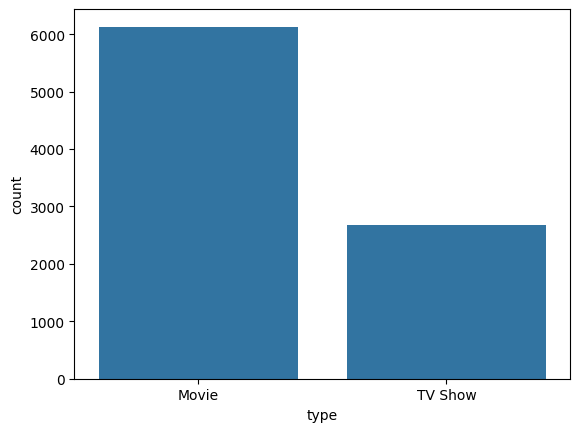

In [19]:
sns.countplot(x = df["type"])

In [26]:
# countries
top10=df_country['country'].value_counts().head(10)
top10

,count
country,
United States,3689
India,1046
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


<Axes: xlabel='country'>

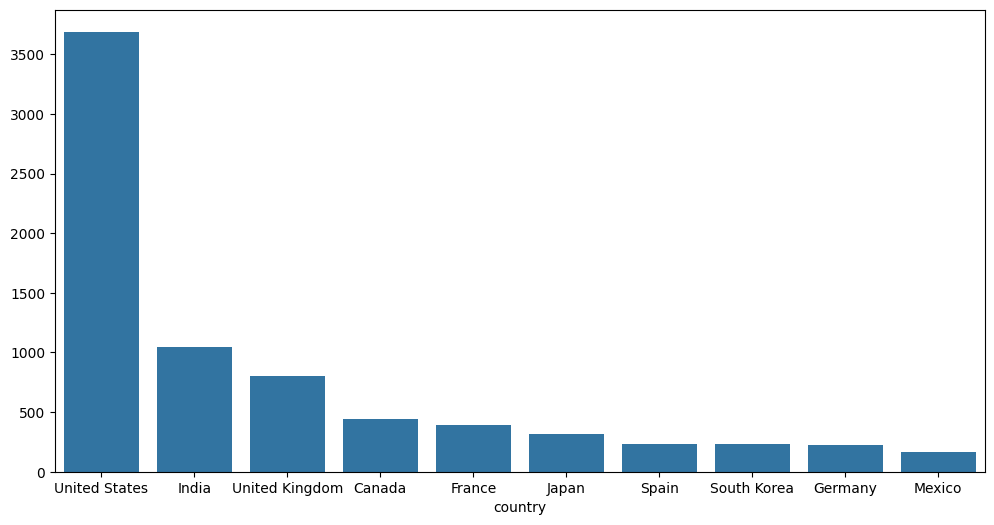

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10.values)

In [66]:
# actors
top10=df_actors['actors'].value_counts().head(10)
top10

,count
actors,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<Axes: xlabel='actors'>

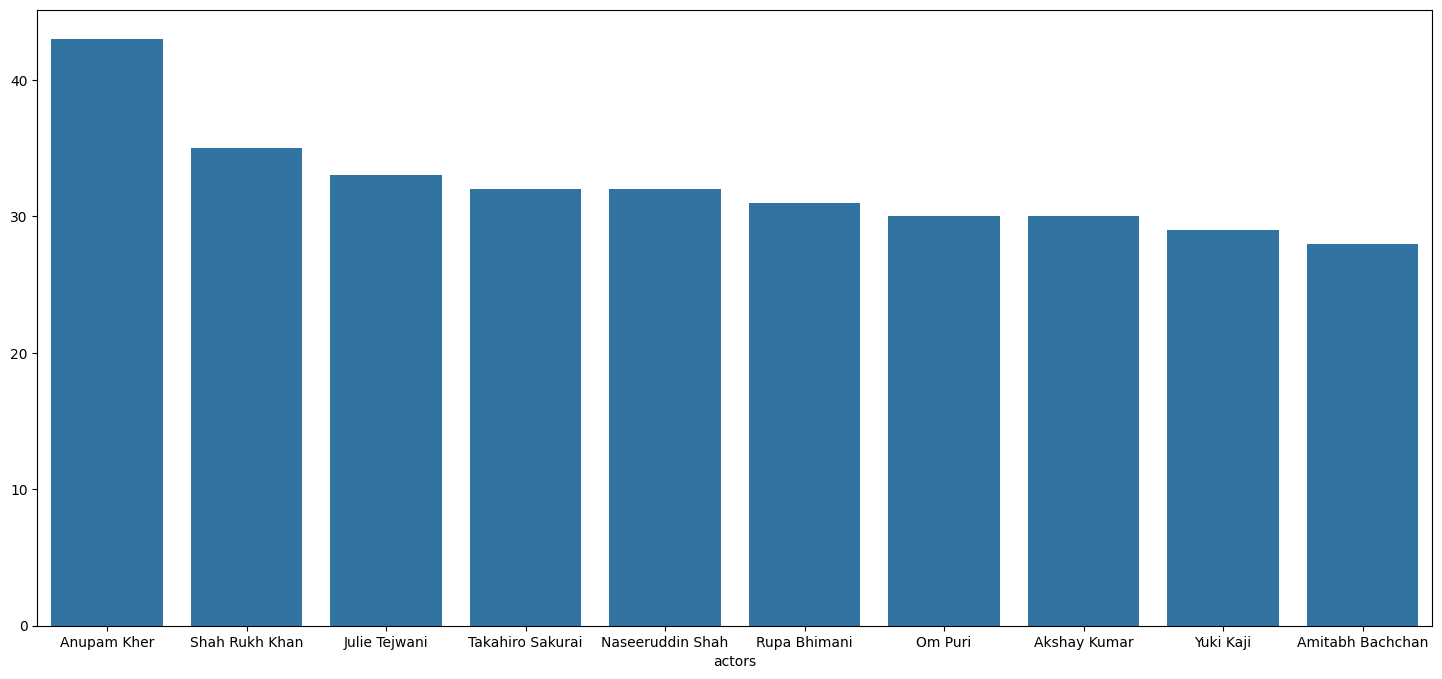

In [23]:
plt.figure(figsize=(18, 8))
sns.barplot(x=top10.index, y=top10.values)

In [67]:
# directors
top10=df_director['director'].value_counts().head(10)
top10

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


<Axes: xlabel='directors'>

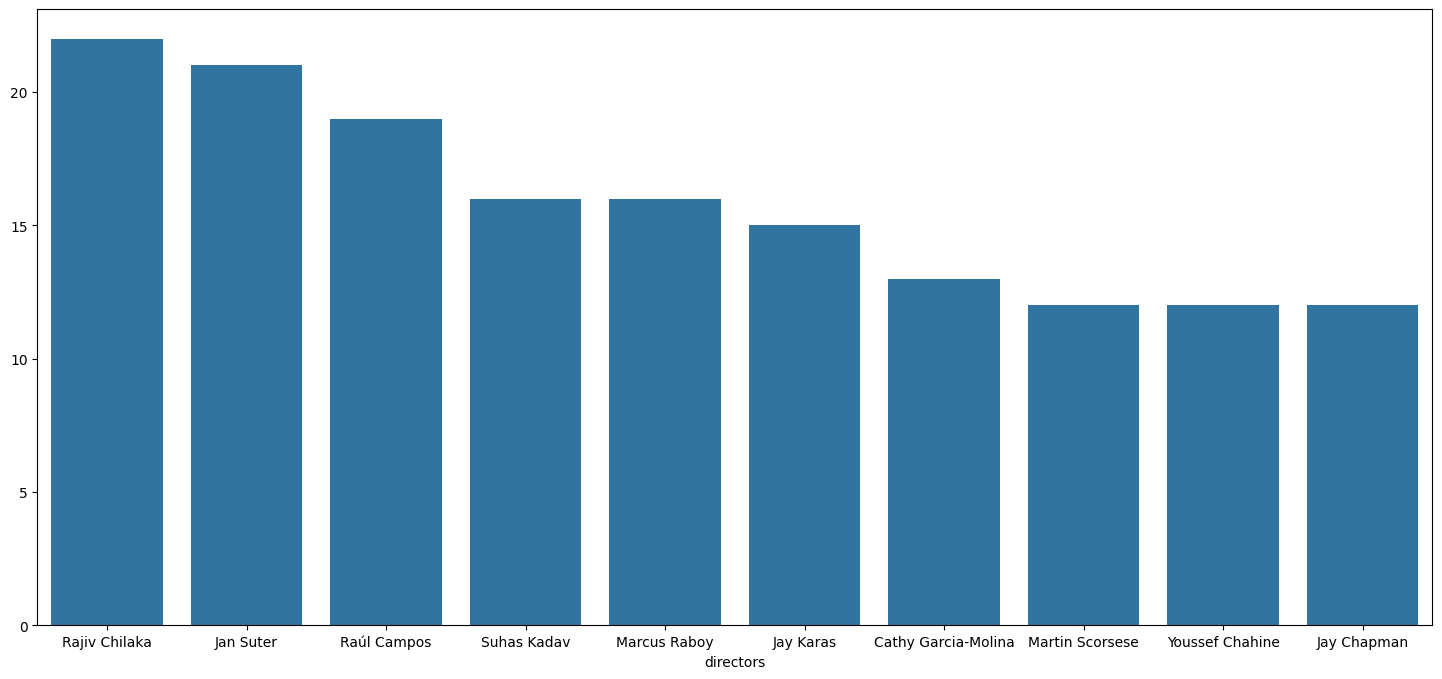

In [25]:
plt.figure(figsize=(18, 8))
sns.barplot(x=top10.index, y=top10.values)

In [68]:
# genre
top10=df_genre['genre'].value_counts().head(10)
top10

,count
genre,


<Axes: xlabel='genre'>

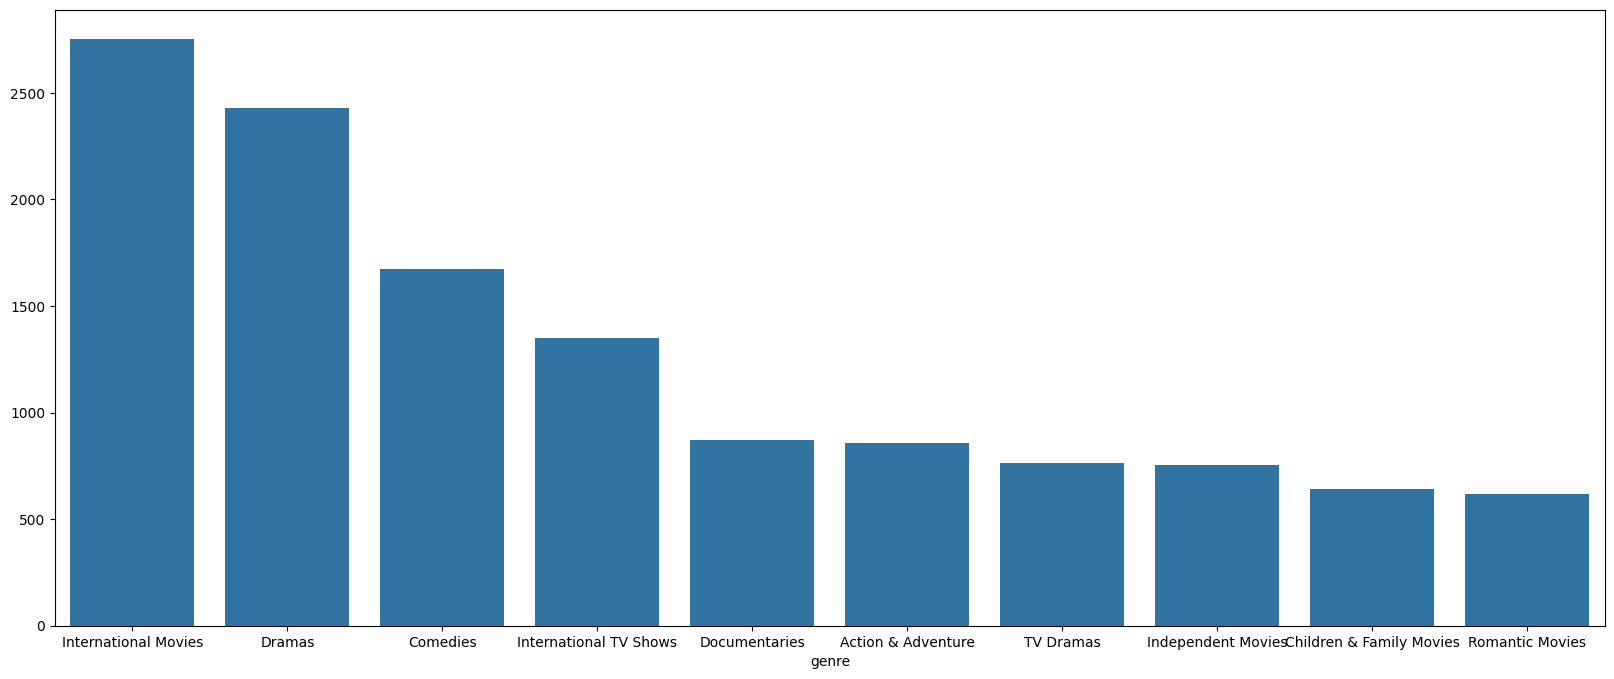

In [27]:
plt.figure(figsize=(20, 8))
sns.barplot(x=top10.index, y=top10.values)

#### Release Year

In [28]:
df["release_year"].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


#### date_added

In [29]:
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')

In [30]:
df["year"] = df["date_added"].dt.year.astype("Int64")
df["month"] = df["date_added"].dt.month.astype("Int64")
df["day"] = df["date_added"].dt.day.astype("Int64")
df["day_of_the_week"] = df["date_added"].dt.day_of_week.astype("Int64")

<Axes: xlabel='day_of_the_week', ylabel='count'>

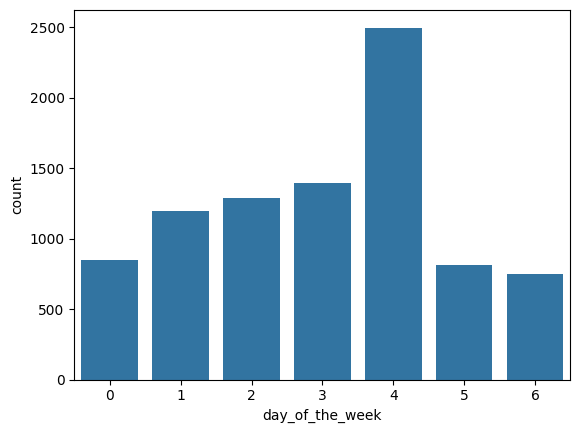

In [31]:
sns.countplot(x = df["day_of_the_week"])

<Axes: xlabel='year', ylabel='count'>

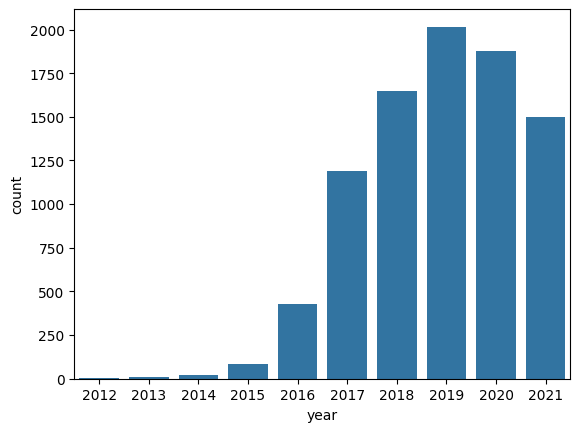

In [32]:
sns.countplot(x=df[df["year"].isin(df["year"].unique()[:10])]["year"])

In [33]:
df["year"].isnull().sum()

np.int64(10)

#### Listed_In

# Business Insights : So according to the data we observed that movies are high in number and actors include Anupam kher , Sharukh khan are most watched we can see in df_actors and directors involes Rajiv , Jan we can see in df_directors type is mostly international and drama.



# Recommendations : According to our observations to increase in sell we should increase the number of movies as compare to tv shows and the release day should be Friday as it includes more watch rate.